## 1. Data Generation

### 1.1. Import Packages

In [1]:
# Numpy & Matplotlib
import numpy as np
import matplotlib.pyplot as plt

# PyTorch
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
import torchvision.transforms as transforms

# Image & Progress Bar
from PIL import Image
from tqdm import tqdm

In [2]:
torch.manual_seed(333)
np.random.seed(333)

### 1.2. Define transform

In [3]:
class MNISTtransform():
    def __init__(self, rot: bool):
        transform_vec = [
            transforms.ToTensor(),
            transforms.Normalize([0.1307], [0.3081]),
        ]
        self.rot = rot
        if self.rot:
            transform_vec.append(
                transforms.RandomRotation([-180, 180])
            )
        
        self.mnist_transform = transforms.Compose(transform_vec)
        
    def __call__(self, img):
        trsf_img = self.mnist_transform(img)
        if self.rot:
            minimum = torch.min(trsf_img)
            trsf_img[trsf_img == 0.0] = minimum
        return trsf_img

### 1.3. Define Dataset

In [4]:
download_root = '~/zdata' # Any Directory you want.

In [5]:
# For rotated train & rotated validation
train_dataset_rot = MNIST(
    download_root,
    transform = MNISTtransform(rot=True),
    train=True,
    download=True
)

val_dataset = MNIST(
    download_root,
    transform=MNISTtransform(rot=True),
    train=False,
    download=True
)

In [6]:
# For original train & rotated validation
train_dataset = MNIST(
    download_root,
    transform = MNISTtransform(rot=False),
    train=True,
    download=True
)

val_dataset = MNIST(
    download_root,
    transform = MNISTtransform(rot=True),
    train=False,
    download=True
)

### 1.4. DataLoader

In [7]:
# For PyTorch DataLoader
# If you use tensorflow, it's not necessary.

batch_size = 256

train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True
)

val_loader = DataLoader(
    dataset=val_dataset,
    batch_size=batch_size,
)

### Example

7


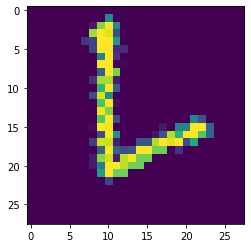

In [8]:
img, label = val_dataset[0]

plt.imshow(img[0])
print(label)

In [9]:
img.shape # (Channel, Height, Width)

torch.Size([1, 28, 28])

### 1.5. Data Convert to Numpy

In [10]:
def data_to_numpy(dataset):
    data = np.array([
        dataset[i][0].detach().numpy() for i in range(len(dataset))
    ])
    targets = dataset.targets.detach().numpy()
    
    return data, targets

In [11]:
train_data, train_targets = data_to_numpy(train_dataset)
train_data_rot, train_targets_rot = data_to_numpy(train_dataset_rot)
val_data, val_targets = data_to_numpy(val_dataset)

In [12]:
train_data.shape

(60000, 1, 28, 28)

In [13]:
train_targets.shape

(60000,)

In [14]:
val_data.shape

(10000, 1, 28, 28)

In [15]:
val_targets.shape

(10000,)

### 1.6. Save Numpy Data

In [16]:
np.savez("train_data_rot", train_data_rot, train_targets_rot)
np.savez("train_data", train_data, train_targets)
np.savez("val_data", val_data, val_targets)

### 1.7. Load Numpy Data

In [39]:
# Unrotated train data
train_data, train_targets = list(
    np.load("train_data.npz").values()
)

# Rotated train data
rtrain_data, rtrain_targets = list(
    np.load("train_data_rot.npz").values()
)

# Rotated validation data
val_data, val_targets = list(
    np.load("val_data.npz").values()
)

In [40]:
train_data.shape

(60000, 1, 28, 28)

In [41]:
train_targets.shape

(60000,)

In [45]:
val_data.shape

(10000, 1, 28, 28)

In [46]:
val_targets.shape

(10000,)

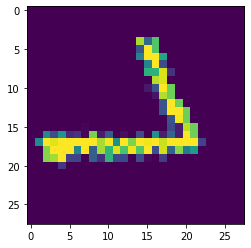

In [44]:
plt.imshow(val_data[0].transpose(1,2,0))
plt.show()

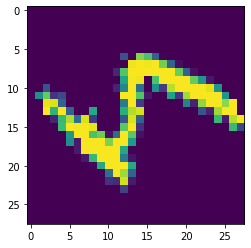

In [48]:
plt.imshow(rtrain_data[0].transpose([1,2,0]))
plt.show()